In [1]:
import geopandas
import fiona
import matplotlib.pyplot as plt

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# Note: the following line won't work unless the above lines are run first
geopandas.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
offices = geopandas.read_file('/Users/todd/GitHub/ecohydrology/Distribution/Info/USACE_Offices.kml', driver='KML')

In [4]:
offices.Name.values

array(['Alaska District', 'Albuquerque District',
       'Army Geospatial Center', 'Baltimore District', 'Buffalo District',
       'Charleston District', 'Chicago District', 'Detroit District',
       'ERDC', 'Europe District', 'Far East District',
       'Ft. Worth District', 'Galveston District',
       'Great Lakes and Ohio River Division', 'Headquarters',
       'Honolulu District', 'Huntington District',
       'Hydrologic Engineering Center', 'Institute for Water Resources',
       'Jacksonville District', 'Japan Engineer District',
       'Kansas City District', 'Little Rock District',
       'Los Angeles District', 'Louisville District', 'Memphis District',
       'Middle East District', 'Mississippi Valley Division',
       'Mobile District', 'Nashville District', 'New England District',
       'New Orleans District', 'New York District', 'Norfolk District',
       'North Atlantic Division', 'Northwest Division', 'Omaha District',
       'Pacific Ocean Division', 'Philadelphi

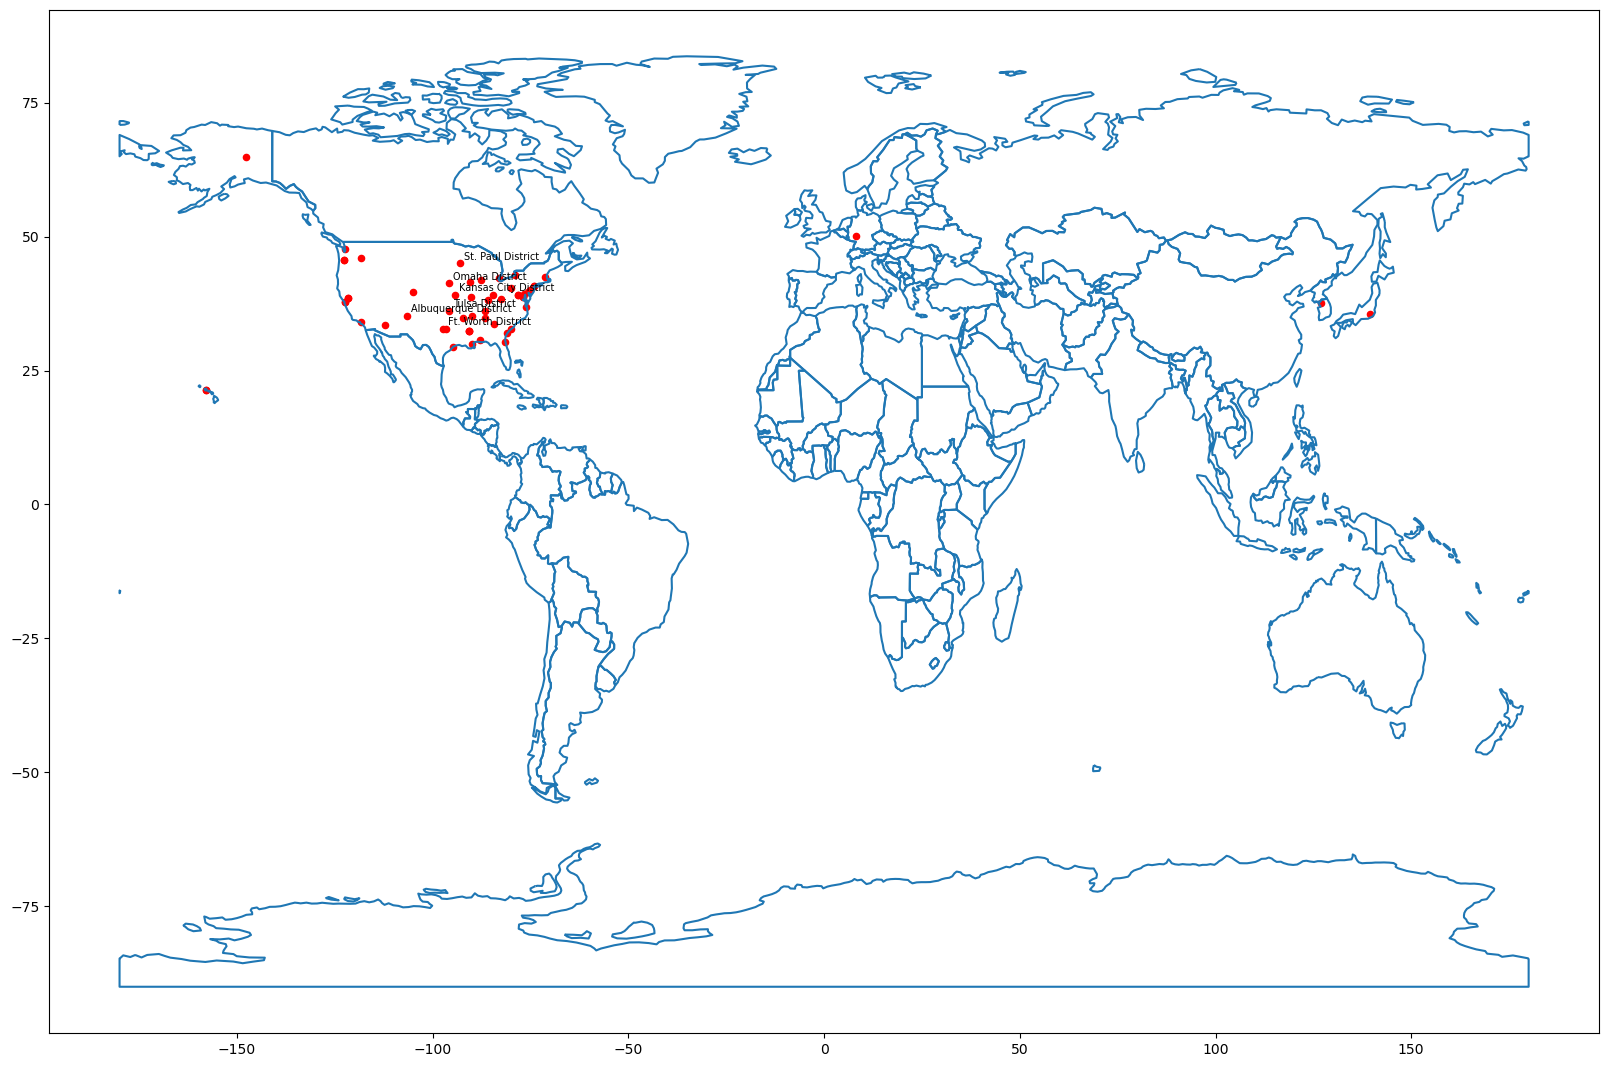

In [5]:
locations_to_plot = ['Denver, CO', 'Albuquerque District', 'Tulsa District', 'Kansas City District', 'Omaha District', 'Ft. Worth District', 'St. Paul District']
fig, ax = plt.subplots(1, 1)
fig.set_size_inches([20,20])
world.boundary.plot(ax=ax)
offices.plot(ax=ax, marker='o', color='red', markersize=20)
for x, y, label in zip(offices.geometry.x, offices.geometry.y, offices.Name):
    if label in locations_to_plot:
        ax.annotate(label, xy=(x, y), xytext=(3, 3), size=7, textcoords="offset points")


In [7]:
# world.plot(column='pop_est', ax=ax, legend=True)
offices.to_excel('USACE_Offices_and_locations_output.xlsx')